In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
df_test = pd.read_csv('/content/drive/MyDrive/Datathon/properties_colombia/properties_colombia_test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Datathon/properties_colombia/properties_colombia_train.csv')

In [4]:
df_train.head(2)

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)


In [5]:
df_test.head(2)

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,geometry
0,852569,pCiVu6rxpBq9dCZfYCXXgA==,Propiedad,2020-09-04,2020-09-12,2020-09-04,4.722,-74.075,Colombia,Cundinamarca,...,3.0,660.0,350.0,COP,NaN,Casa En Arriendo/venta En Bogota Sotileza Cod....,"EXCLUSIVA CASA EN VENTA Y ARRIENDO, UBICADA EN...",Casa,Venta,POINT (-74.075 4.722)
1,121379,L0XSQ7mF1TWb1lHRg4n2+A==,Propiedad,2020-10-20,2020-10-20,2020-10-20,NaN,NaN,Colombia,Antioquia,...,3.0,NaN,NaN,COP,Mensual,SE VENDE APARTAMENTO EN EL SECTOR DE ZUÑIGA-EN...,"PR 7555. Apartamento Duplex en unidad cerrada,...",Apartamento,Venta,POINT EMPTY


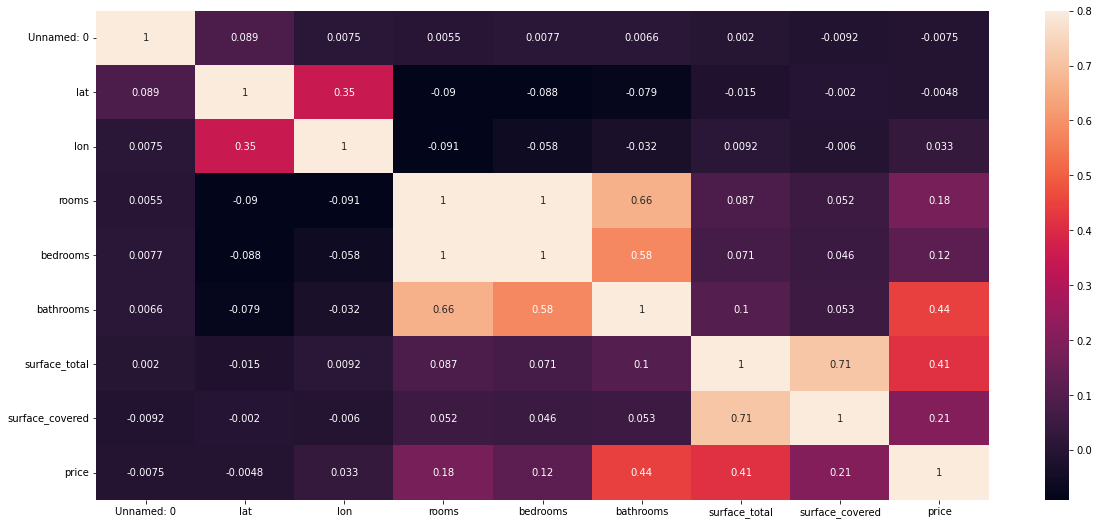

In [6]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

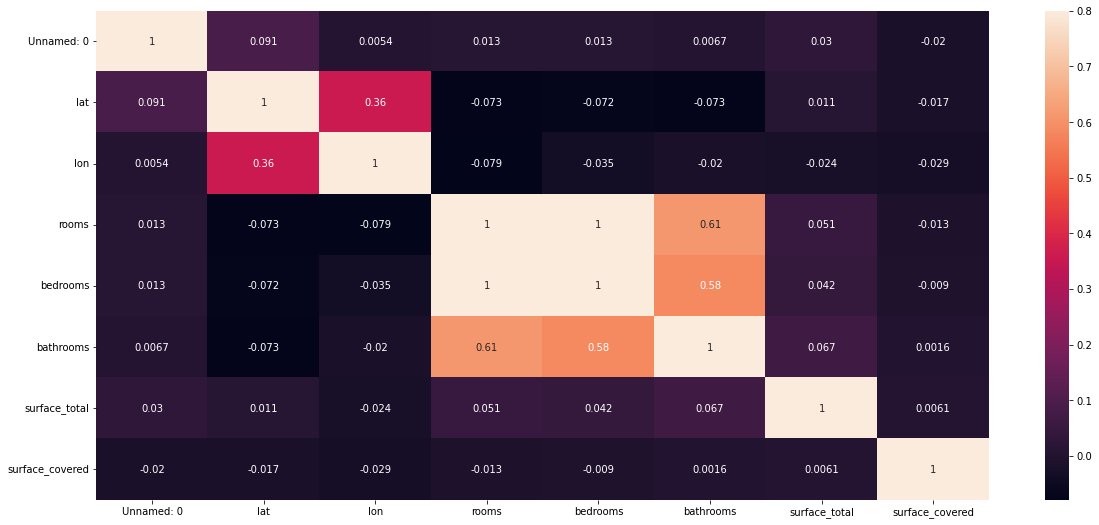

In [7]:
#correlation matrix
corrmat = df_test.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

### Hacemos un Drop a las columnas Insignificantes

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       197549 non-null  int64  
 1   id               197549 non-null  object 
 2   ad_type          197549 non-null  object 
 3   start_date       197549 non-null  object 
 4   end_date         197549 non-null  object 
 5   created_on       197549 non-null  object 
 6   lat              148051 non-null  float64
 7   lon              148051 non-null  float64
 8   l1               197549 non-null  object 
 9   l2               197549 non-null  object 
 10  l3               186517 non-null  object 
 11  l4               45367 non-null   object 
 12  l5               27409 non-null   object 
 13  l6               6867 non-null    object 
 14  rooms            27537 non-null   float64
 15  bedrooms         40525 non-null   float64
 16  bathrooms        156467 non-null  floa

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65850 entries, 0 to 65849
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       65850 non-null  int64  
 1   id               65850 non-null  object 
 2   ad_type          65850 non-null  object 
 3   start_date       65850 non-null  object 
 4   end_date         65850 non-null  object 
 5   created_on       65850 non-null  object 
 6   lat              49433 non-null  float64
 7   lon              49433 non-null  float64
 8   l1               65850 non-null  object 
 9   l2               65850 non-null  object 
 10  l3               62193 non-null  object 
 11  l4               15074 non-null  object 
 12  l5               9052 non-null   object 
 13  l6               2364 non-null   object 
 14  rooms            9110 non-null   float64
 15  bedrooms         13403 non-null  float64
 16  bathrooms        52054 non-null  float64
 17  surface_tota

In [10]:
df_train = df_train.drop(['Unnamed: 0','id','start_date','ad_type','end_date', 'created_on', 'l1','l2','l3','l4','l5','l6','currency',
                  'title', 'description', 'operation_type', 'price_period','geometry','property_type'], axis=1)
df_test = df_test.drop(['Unnamed: 0','id','start_date','ad_type','end_date', 'created_on', 'l1','l2','l3','l4','l5','l6','currency',
                  'title', 'description', 'operation_type', 'price_period','geometry','property_type'], axis=1)


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   lat              148051 non-null  float64
 1   lon              148051 non-null  float64
 2   rooms            27537 non-null   float64
 3   bedrooms         40525 non-null   float64
 4   bathrooms        156467 non-null  float64
 5   surface_total    6974 non-null    float64
 6   surface_covered  9802 non-null    float64
 7   price            197486 non-null  float64
dtypes: float64(8)
memory usage: 12.1 MB


# se procederá a explorar los datos para identificar los valores atípicos

El diagrama de cajas nos permite identificar fácilmente, y de forma visual, si tenemos outliers.



In [12]:
lista = df_train[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

for i in lista: 
    Q1 = df_train[i].quantile(0.25)
    Q3 = df_train[i].quantile(0.75)
    IQR = Q3 - Q1
    BI = Q1 - 1.5*IQR
    BS = Q3 + 1.5*IQR
    #print (i,IQR, BI, BS)
    out = (df_train[i]<BI) | (df_train[i]>BS)
    print('Cantidad de valores eliminados para el atributo', [i],':', out.sum())
    df_train = df_train[~out]

df_train.shape

Cantidad de valores eliminados para el atributo ['rooms'] : 3236
Cantidad de valores eliminados para el atributo ['bedrooms'] : 16571
Cantidad de valores eliminados para el atributo ['bathrooms'] : 12198
Cantidad de valores eliminados para el atributo ['surface_total'] : 704
Cantidad de valores eliminados para el atributo ['surface_covered'] : 312
Cantidad de valores eliminados para el atributo ['price'] : 15125


(149403, 8)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149403 entries, 1 to 197548
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   lat              107140 non-null  float64
 1   lon              107140 non-null  float64
 2   rooms            12428 non-null   float64
 3   bedrooms         18215 non-null   float64
 4   bathrooms        125265 non-null  float64
 5   surface_total    2845 non-null    float64
 6   surface_covered  4116 non-null    float64
 7   price            149372 non-null  float64
dtypes: float64(8)
memory usage: 10.3 MB


Text(0.5, 0, 'Precio')

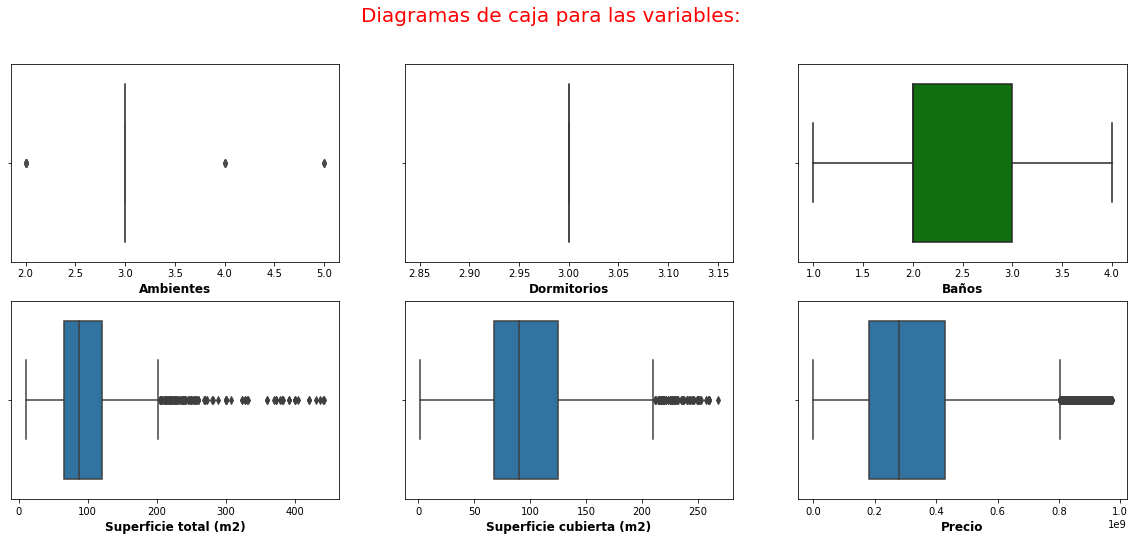

In [14]:

plt.figure(figsize=(20,8))

plt.suptitle('Diagramas de caja para las variables:', color='red', fontsize=20)

plt.subplot(2,3,1)
sns.boxplot(x=df_train['rooms'], color = 'yellow')
plt.xlabel('Ambientes', fontweight= 'black', fontsize= 12)


plt.subplot(2,3,2)
sns.boxplot(x=df_train['bedrooms'], color = 'brown')
plt.xlabel('Dormitorios', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,3)
sns.boxplot(x=df_train['bathrooms'], color= 'green')
plt.xlabel('Baños', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,4)
sns.boxplot(x=df_train['surface_total'])
plt.xlabel('Superficie total (m2)', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,5)
sns.boxplot(x=df_train['surface_covered'])
plt.xlabel('Superficie cubierta (m2)', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,6)
sns.boxplot(x=df_train['price'])
plt.xlabel('Precio', fontweight= 'black', fontsize= 12)

Text(0, 0.5, 'Cantidad')

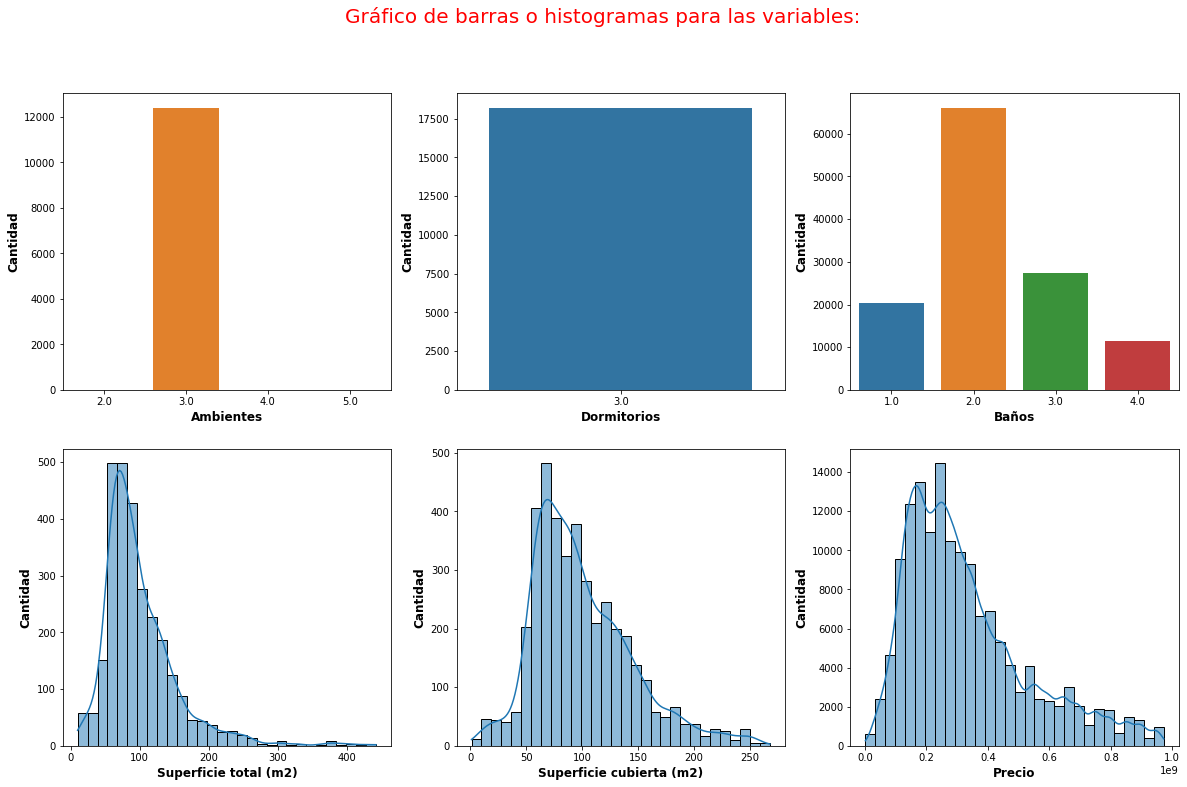

In [15]:
plt.figure(figsize=(20,12))

plt.suptitle('Gráfico de barras o histogramas para las variables:', color='red', fontsize=20)

plt.subplot(2,3,1)
sns.countplot(x= df_train.rooms)
plt.xlabel('Ambientes', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,2)
sns.countplot(x= df_train.bedrooms)
plt.xlabel('Dormitorios', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,3)
sns.countplot(x= 'bathrooms', data=df_train)
plt.xlabel('Baños', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)

plt.subplot(2,3,4)
max1= df_train[df_train.surface_total <=500] #Este valor arbitrario es para permitir su correcta visualización en un histograma
sns.histplot(max1['surface_total'], kde=True, bins=30)
plt.xlabel('Superficie total (m2)', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)


plt.subplot(2,3,5)
max2 = df_train[df_train.surface_covered <= 500]
sns.histplot(max2['surface_covered'], kde=True, bins=30)
plt.xlabel('Superficie cubierta (m2)', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)


plt.subplot(2,3,6)
max3 = df_train[df_train.price > 900000]
sns.histplot(max3['price'], kde=True, bins=30)
plt.xlabel('Precio', fontweight= 'black', fontsize= 12)
plt.ylabel('Cantidad', fontweight= 'black', fontsize= 12)

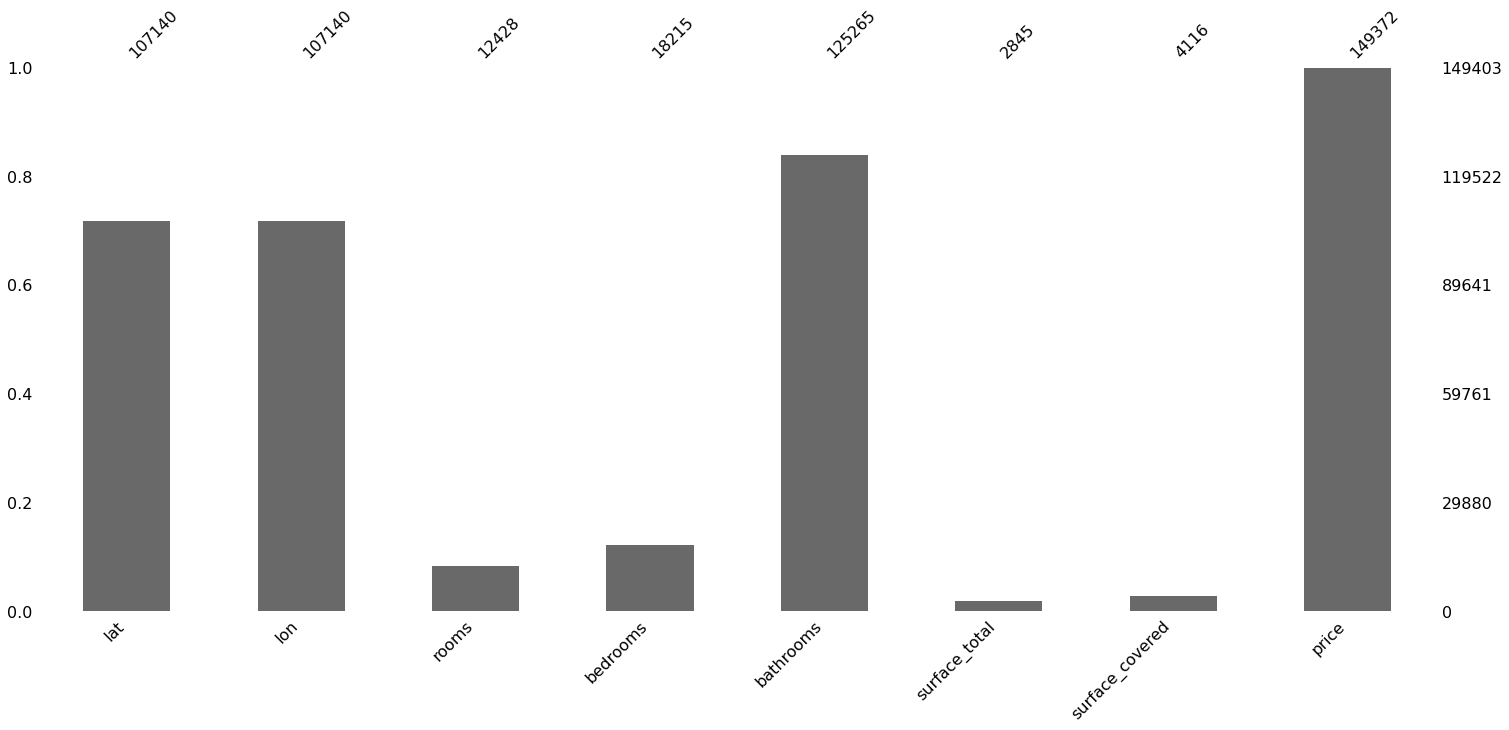

In [16]:
import missingno as msno
msno.bar(df_train)
plt.show()

In [17]:
from sklearn.impute import SimpleImputer
# Using Simple Imputer

si_lat = SimpleImputer(strategy='mean')
si_lat.fit(df_train["lat"].values[:,None])
df_train["lat"] = si_lat.transform(df_train["lat"].values[:,None])

si_lon = SimpleImputer(strategy='mean')
si_lon.fit(df_train["lon"].values[:,None])
df_train["lon"] = si_lon.transform(df_train["lon"].values[:,None])

si_bedrooms = SimpleImputer(strategy='mean')
si_bedrooms.fit(df_train["bedrooms"].values[:,None])
df_train["bedrooms"] = si_bedrooms.transform(df_train["bedrooms"].values[:,None])

si_bath = SimpleImputer(strategy='mean')
si_bath.fit(df_train["bathrooms"].values[:,None])
df_train["bathrooms"] = si_bath.transform(df_train["bathrooms"].values[:,None])

si_bath = SimpleImputer(strategy='mean')
si_bath.fit(df_train["surface_total"].values[:,None])
df_train["surface_total"] = si_bath.transform(df_train["surface_total"].values[:,None])

si_bath = SimpleImputer(strategy='mean')
si_bath.fit(df_train["surface_covered"].values[:,None])
df_train["surface_covered"] = si_bath.transform(df_train["surface_covered"].values[:,None])


In [18]:
si_bath = SimpleImputer(strategy='mean')
si_bath.fit(df_train["rooms"].values[:,None])
df_train["rooms"] = si_bath.transform(df_train["rooms"].values[:,None])


In [19]:
si_bath = SimpleImputer(strategy='mean')
si_bath.fit(df_train["price"].values[:,None])
df_train["price"] = si_bath.transform(df_train["price"].values[:,None])

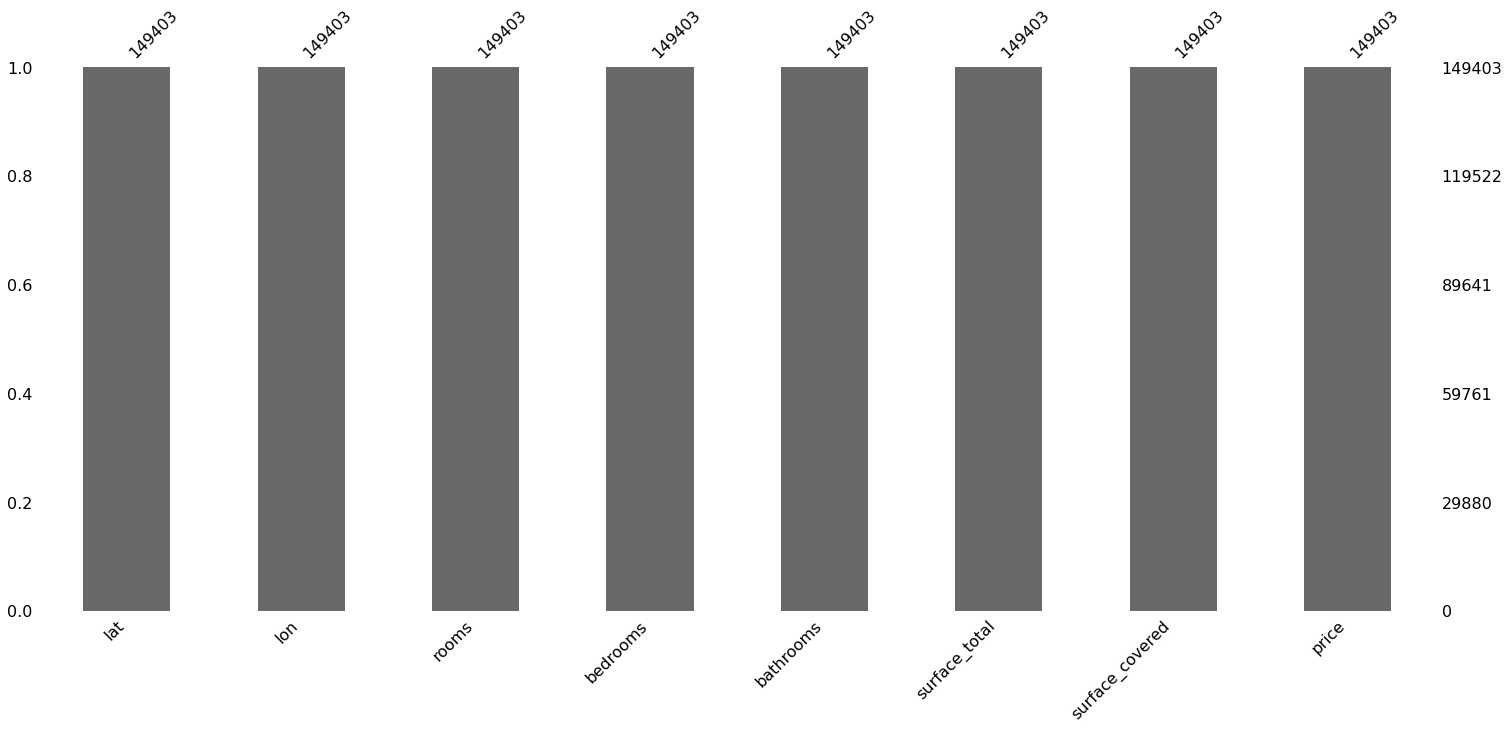

In [20]:
msno.bar(df_train)
plt.show()

In [21]:
df_train.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
1,4.722748,-74.073115,3.000241,3.0,2.0,100.22355,99.567784,625000000.0
2,4.709000,-74.030000,3.000241,3.0,2.0,100.22355,99.567784,420000000.0
4,5.755436,-75.055225,3.000241,3.0,2.0,100.22355,99.567784,210000000.0
5,5.049009,-75.506802,3.000241,3.0,2.0,100.22355,99.567784,167952300.0
7,10.990806,-74.821082,3.000241,3.0,2.0,100.22355,99.567784,184000000.0


In [22]:
df_test.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,4.722000,-74.075000,3.0,3.0,3.0,660.0,350.0
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,6.259253,-75.628381,NaN,NaN,1.0,NaN,NaN
3,6.203000,-75.556000,NaN,NaN,NaN,2793.0,NaN
4,NaN,NaN,NaN,NaN,2.0,NaN,NaN


In [23]:
from sklearn.impute import SimpleImputer
# Using Simple Imputer

si_lat = SimpleImputer(strategy='mean')
si_lat.fit(df_test["lat"].values[:,None])
df_test["lat"] = si_lat.transform(df_test["lat"].values[:,None])

si_lon = SimpleImputer(strategy='mean')
si_lon.fit(df_test["lon"].values[:,None])
df_test["lon"] = si_lon.transform(df_test["lon"].values[:,None])

si_bedrooms = SimpleImputer(strategy='mean')
si_bedrooms.fit(df_test["bedrooms"].values[:,None])
df_test["bedrooms"] = si_bedrooms.transform(df_test["bedrooms"].values[:,None])

si_bath = SimpleImputer(strategy='mean')
si_bath.fit(df_test["bathrooms"].values[:,None])
df_test["bathrooms"] = si_bath.transform(df_test["bathrooms"].values[:,None])

si_bath = SimpleImputer(strategy='mean')
si_bath.fit(df_test["surface_total"].values[:,None])
df_test["surface_total"] = si_bath.transform(df_test["surface_total"].values[:,None])

si_bath = SimpleImputer(strategy='mean')
si_bath.fit(df_test["surface_covered"].values[:,None])
df_test["surface_covered"] = si_bath.transform(df_test["surface_covered"].values[:,None])

si_bath = SimpleImputer(strategy='mean')
si_bath.fit(df_test["rooms"].values[:,None])
df_test["rooms"] = si_bath.transform(df_test["rooms"].values[:,None])


In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65850 entries, 0 to 65849
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lat              65850 non-null  float64
 1   lon              65850 non-null  float64
 2   rooms            65850 non-null  float64
 3   bedrooms         65850 non-null  float64
 4   bathrooms        65850 non-null  float64
 5   surface_total    65850 non-null  float64
 6   surface_covered  65850 non-null  float64
dtypes: float64(7)
memory usage: 3.5 MB


In [25]:
df_train.price.mean()

330758266.6285582

In [26]:
from sklearn.preprocessing import (PowerTransformer, StandardScaler, 
                                   MinMaxScaler, LabelEncoder, OneHotEncoder)

In [27]:
df_train

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
1,4.722748,-74.073115,3.000241,3.0,2.000000,100.22355,99.567784,625000000.0
2,4.709000,-74.030000,3.000241,3.0,2.000000,100.22355,99.567784,420000000.0
4,5.755436,-75.055225,3.000241,3.0,2.000000,100.22355,99.567784,210000000.0
5,5.049009,-75.506802,3.000241,3.0,2.000000,100.22355,99.567784,167952300.0
7,10.990806,-74.821082,3.000241,3.0,2.000000,100.22355,99.567784,184000000.0
...,...,...,...,...,...,...,...,...
197544,4.649682,-74.161950,3.000000,3.0,2.237057,100.22355,99.567784,129000000.0
197545,4.668000,-74.055000,3.000241,3.0,1.000000,100.22355,17.000000,135000000.0
197546,3.413000,-76.541000,3.000241,3.0,1.000000,100.22355,99.567784,520000000.0
197547,4.674874,-74.147077,3.000241,3.0,2.000000,100.22355,99.567784,290000000.0


In [28]:
import numpy as np

In [29]:
df_train['precio'] = np.where(df_train['price']
                      >df_train.price.mean(), 1,0 )

In [30]:
df_train.price.mean()

330758266.6285582

In [31]:
df_train.head(50)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,precio
1,4.722748,-74.073115,3.000241,3.0,2.000000,100.22355,99.567784,625000000.0,1
2,4.709000,-74.030000,3.000241,3.0,2.000000,100.22355,99.567784,420000000.0,1
4,5.755436,-75.055225,3.000241,3.0,2.000000,100.22355,99.567784,210000000.0,0
5,5.049009,-75.506802,3.000241,3.0,2.000000,100.22355,99.567784,167952300.0,0
7,10.990806,-74.821082,3.000241,3.0,2.000000,100.22355,99.567784,184000000.0,0
8,10.977000,-74.809000,3.000241,3.0,2.000000,100.22355,99.567784,250000000.0,0
9,5.755436,-75.055225,3.000241,3.0,3.000000,100.22355,99.567784,611000000.0,1
10,3.447725,-76.490886,3.000241,3.0,2.000000,100.22355,99.567784,280000000.0,0
11,5.755436,-75.055225,3.000241,3.0,2.000000,100.22355,99.567784,210000000.0,0
13,5.093294,-75.531532,3.000241,3.0,2.000000,100.22355,99.567784,200000000.0,0


In [35]:
df_train = df_train.drop(['price'], axis=1)
df_train.head()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,precio
1,4.722748,-74.073115,3.000241,3.0,2.0,100.22355,99.567784,1
2,4.709000,-74.030000,3.000241,3.0,2.0,100.22355,99.567784,1
4,5.755436,-75.055225,3.000241,3.0,2.0,100.22355,99.567784,0
5,5.049009,-75.506802,3.000241,3.0,2.0,100.22355,99.567784,0
7,10.990806,-74.821082,3.000241,3.0,2.0,100.22355,99.567784,0


In [36]:
X = df_train.iloc[:, :-7].values
y = df_train.iloc[:, 7].values

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [42]:
y_pred  = classifier.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [46]:
y_pred.shape

(29881,)

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [48]:
cm

array([[16330,  1990],
       [ 5743,  5818]])

In [67]:
pred = pd.DataFrame(y_pred, columns=['pred']).to_csv('/content/drive/MyDrive/Datathon/sergioarnold87_5.csv',index=False)


# Decision Tree